## Comparing spending on education and police protection for each state

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
eduspend = pd.read_csv('data/statebystatespending/2000-2016_combined.csv')

In [3]:
polspend = pd.read_csv('data/slgeppus0017/t01_combined.csv')

In [4]:
for col in eduspend.columns:
    print(col)

Unnamed: 0
state
PK12ed_real
PK12ed_realperch
highered_real
highered_realperch
edsubs_real
edsubs_realperch
edservs_real
edservs_realperch
HeadStartPriv_real
HeadStartPriv_realperch
year


In [5]:
# create new columns to get total spending
# not including 'highered' spending

eduspend['tot_real'] = eduspend.loc[:,['PK12ed_real','edsubs_real','edservs_real','HeadStartPriv_real']].sum(axis=1)
eduspend['tot_realperch'] = eduspend.loc[:,['PK12ed_realperch','edsubs_realperch','edservs_realperch','HeadStartPriv_realperch']].sum(axis=1)

In [6]:
eduspend.head()

,Unnamed: 0,state,PK12ed_real,PK12ed_realperch,highered_real,highered_realperch,edsubs_real,edsubs_realperch,edservs_real,edservs_realperch,HeadStartPriv_real,HeadStartPriv_realperch,year,tot_real,tot_realperch
0,0,Alabama,5.460038e+06,4.597625,1.476930e+06,1.243649,1.896633e+05,0.159706,3.750779e+05,0.315834,96889.468750,0.081586,2000,6.121669e+06,5.154751
1,1,Alaska,1.544093e+06,7.729855,3.399349e+05,1.701742,7.401975e+03,0.037055,6.095320e+04,0.305137,13269.593750,0.066429,2000,1.625717e+06,8.138475
2,2,Arizona,5.704004e+06,3.937628,1.694332e+06,1.169643,1.956454e+05,0.135059,1.718833e+05,0.118656,76180.015625,0.052589,2000,6.147713e+06,4.243932
3,3,Arkansas,3.166992e+06,4.398520,8.313132e+05,1.154581,1.705997e+05,0.236940,2.625575e+05,0.364657,65212.699219,0.090572,2000,3.665362e+06,5.090688
4,4,California,4.995363e+07,5.117807,1.376928e+07,1.410679,1.526062e+06,0.156347,1.753114e+06,0.179609,575786.750000,0.058990,2000,5.380859e+07,5.512753


In [7]:
polspend.head()

,Unnamed: 0,Year,RealExpend(S&L),RealDirectGenExpend(S&L),USPop_x,RealExpendPerCapita(S&L),RealDirectGenExpendPerCapita(S&L),%ExpendofDirGDP(S&L),RealExpend(L),RealDirectGenExpend(L),USPop_y,RealExpendPerCapita(L),RealDirectGenExpendPerCapita(L),%ExpendofDirGDP(L)
0,0,2000,72745294,1924700455,282162411,257.81,6821.25,3.78,61755383,1108012978,282162411,218.86,3926.86,5.57
1,1,2001,74676295,2032532093,284968955,262.05,7132.47,3.67,63562251,1161533851,284968955,223.05,4076.00,5.47
2,2,2002,79527211,2137490124,287625193,276.50,7431.51,3.72,67920344,1217313198,287625193,236.14,4232.29,5.58
3,3,2003,81593793,2201524820,290107933,281.25,7588.64,3.71,69650070,1254577097,290107933,240.08,4324.52,5.55
4,4,2004,82670804,2245712845,292805298,282.34,7669.65,3.68,71470607,1279177968,292805298,244.09,4368.70,5.59


In [8]:
print(polspend.dtypes)

Unnamed: 0                             int64
Year                                   int64
RealExpend(S&L)                        int64
RealDirectGenExpend(S&L)               int64
USPop_x                                int64
RealExpendPerCapita(S&L)             float64
RealDirectGenExpendPerCapita(S&L)    float64
%ExpendofDirGDP(S&L)                 float64
RealExpend(L)                          int64
RealDirectGenExpend(L)                 int64
USPop_y                                int64
RealExpendPerCapita(L)               float64
RealDirectGenExpendPerCapita(L)      float64
%ExpendofDirGDP(L)                   float64
dtype: object


In [9]:
print(eduspend.dtypes)

Unnamed: 0                   int64
state                       object
PK12ed_real                float64
PK12ed_realperch           float64
highered_real              float64
highered_realperch         float64
edsubs_real                float64
edsubs_realperch           float64
edservs_real               float64
edservs_realperch          float64
HeadStartPriv_real         float64
HeadStartPriv_realperch    float64
year                         int64
tot_real                   float64
tot_realperch              float64
dtype: object


In [10]:
eduspend['year'] = eduspend['year'].astype(str)
polspend['Year'] = polspend['Year'].astype(str)

In [11]:
polspend.drop('Unnamed: 0', axis=1, inplace=True)
#polspend.head()

In [12]:
# sum edu spending of all states per year

#newedu = eduspend[['year', 'state', 'tot_real']].groupby(['year', 'state']).sum()
#newedu = newedu.reset_index()

newedu = eduspend[['year', 'tot_real']].groupby(['year']).sum()
newedu = newedu.reset_index()
newedu

,year,tot_real
0,2000,4.564139e+08
1,2001,4.742969e+08
2,2002,4.941089e+08
3,2003,5.128422e+08
4,2004,5.277286e+08
5,2005,5.379345e+08
6,2006,5.486675e+08
7,2007,5.653173e+08
8,2008,5.851442e+08
9,2009,5.952837e+08


In [13]:
print(newedu.dtypes)

year         object
tot_real    float64
dtype: object


In [14]:
# sum edu spending of all states per year using totals per child

neweduperch = eduspend[['year', 'tot_realperch']].groupby(['year']).sum()
neweduperch = neweduperch.reset_index()
neweduperch

,year,tot_realperch
0,2000,304.234290
1,2001,315.412449
2,2002,327.834195
3,2003,339.648284
4,2004,349.017329
5,2005,356.442478
6,2006,363.961863
7,2007,374.195097
8,2008,390.774317
9,2009,402.565164


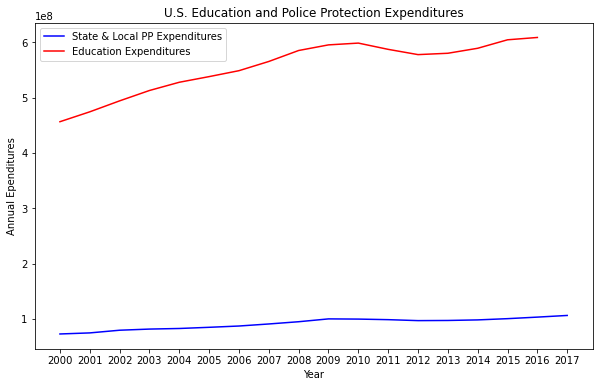

In [15]:
# create line graph

plt.figure(figsize=(10,6))
plt.title('U.S. Education and Police Protection Expenditures')
plt.xlabel('Year')
plt.ylabel('Annual Ependitures')

plt.plot(polspend['Year'], polspend['RealExpend(S&L)'], label='State & Local PP Expenditures', color='blue')
plt.plot(newedu['year'], newedu['tot_real'], label='Education Expenditures', color='red')

plt.legend(loc='best')

plt.savefig('charts/education-vs-pp-expenditures', bbox_inches='tight')

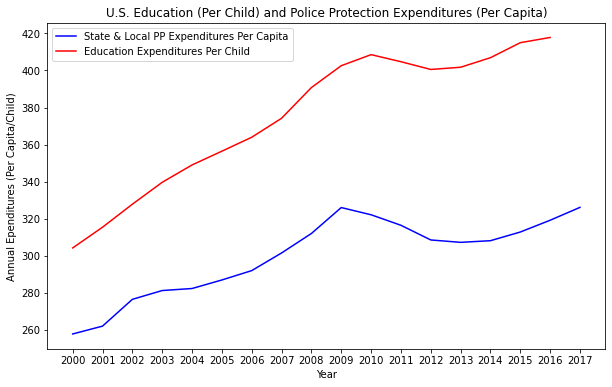

In [16]:
# create line graph of expenditures per child/capita

plt.figure(figsize=(10,6))
plt.title('U.S. Education (Per Child) and Police Protection Expenditures (Per Capita)')
plt.xlabel('Year')
plt.ylabel('Annual Ependitures (Per Capita/Child)')

plt.plot(polspend['Year'], polspend['RealExpendPerCapita(S&L)'], label='State & Local PP Expenditures Per Capita', 
         color='blue')
plt.plot(neweduperch['year'], neweduperch['tot_realperch'], label='Education Expenditures Per Child', color='red')

plt.legend(loc='best')
plt.savefig('charts/education-vs-pp-expenditures-per-capita', bbox_inches='tight')